In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Data Collection

In [2]:
datac = pd.read_csv(r"C:\Users\Nithya\Downloads\archive (4)\apple_quality.csv")

### Data Exploration

In [3]:
data = datac.copy()
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [7]:
data["Acidity"] = data["Acidity"].astype("float64")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


### Data Cleaning

In [6]:
data.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [6]:
data.drop(4000, axis=0, inplace=True)

In [8]:
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [9]:
data.duplicated().sum()

0

### EDA

In [12]:
data["Quality"].value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

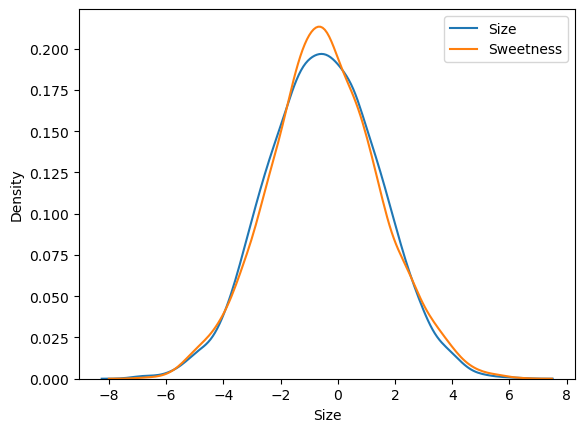

In [33]:
sns.kdeplot(data["Size"], label="Size")
sns.kdeplot(data["Sweetness"], label="Sweetness")
plt.legend()
plt.show()

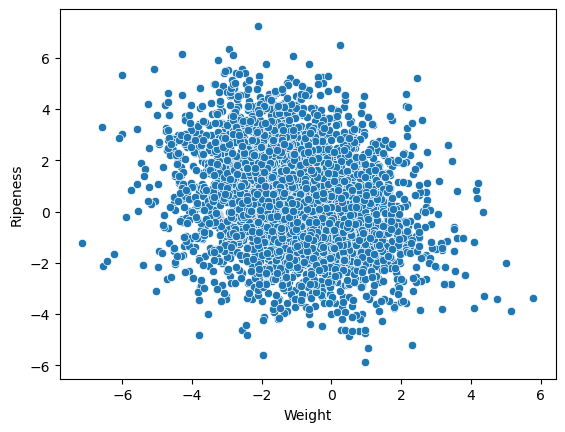

In [31]:
sns.scatterplot(x=data["Weight"], y=data["Ripeness"])
plt.show()

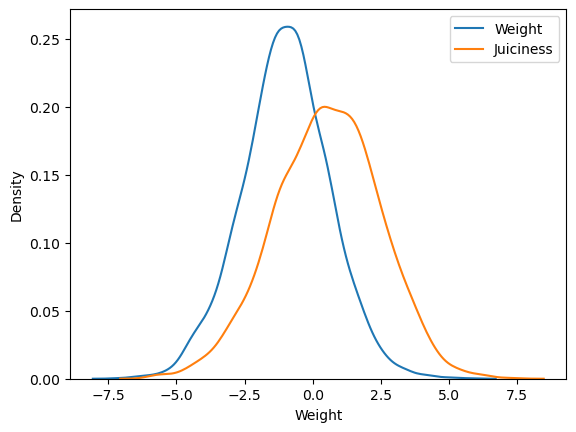

In [34]:
sns.kdeplot(data["Weight"], label="Weight")
sns.kdeplot(data["Juiciness"], label="Juiciness")
plt.legend()
plt.show()

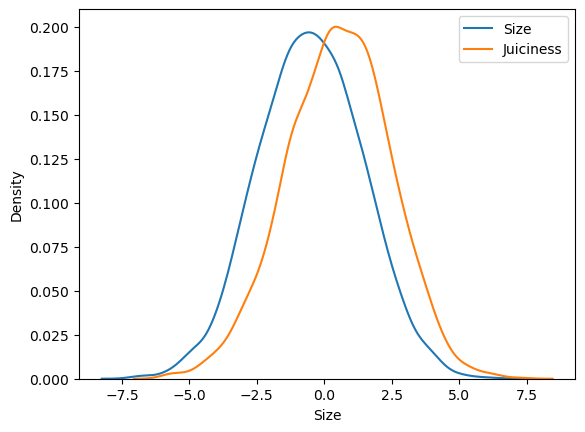

In [36]:
sns.kdeplot(data["Size"], label="Size")
sns.kdeplot(data["Juiciness"], label="Juiciness")
plt.legend()
plt.show()

In [13]:
feature_var = data.iloc[:, 1:-1]
feature_var

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [14]:
class_var = data[["Quality"]]
class_var

,Quality
0,good
1,good
2,bad
3,good
4,good
...,...
3995,bad
3996,good
3997,bad
3998,good


In [15]:
class_var["Quality"] = class_var["Quality"].map({"good":1, "bad":0})
class_var["Quality"]

C:\Users\Nithya\AppData\Local\Temp\ipykernel_2524\4166841774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_var["Quality"] = class_var["Quality"].map({"good":1, "bad":0})


0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

### Split the dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(feature_var,class_var,test_size=0.2,random_state=22,stratify=class_var)

In [18]:
x_train

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
2974,-1.780332,-0.647456,0.921314,0.190043,2.566732,0.032295,2.274141
2919,-2.504458,1.225209,-0.325496,1.066859,-0.032165,0.684767,1.334702
2224,-2.515846,0.556792,-0.256970,1.133642,1.241173,0.291944,-0.359521
2069,-0.769127,-2.158430,1.902392,1.127191,-0.201490,1.912931,-0.062893
2178,-0.902667,-4.034102,2.158642,1.725308,-0.160970,-1.026507,-4.448054
...,...,...,...,...,...,...,...
2569,-1.784265,-1.154856,1.044179,-0.812830,2.171637,2.529716,-0.964945
1015,2.461236,-1.372054,-4.432615,3.067026,-0.619639,1.440307,0.749383
2666,-3.697842,-0.497699,2.251603,-1.069921,0.791398,1.520629,1.045149
953,0.986430,-2.754967,2.137415,2.135528,1.202553,1.500783,-0.534094


### Data Normalization

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
std = StandardScaler()

In [43]:
x_train_std = std.fit_transform(x_train)
x_train_std

array([[-0.66468362,  0.2065212 ,  0.71973529, ...,  1.06773756,
        -0.2489364 ,  1.05972176],
       [-1.04353187,  1.37310827,  0.0764026 , ..., -0.27219177,
         0.10021587,  0.6090014 ],
       [-1.04949   ,  0.95671388,  0.11176059, ...,  0.38431074,
        -0.10999262, -0.20384607],
       ...,
       [-1.66788687,  0.29981291,  1.40614206, ...,  0.15241767,
         0.54750376,  0.47008061],
       [ 0.78283079, -1.10636417,  1.34722293, ...,  0.36439913,
         0.53688359, -0.28760234],
       [ 0.94981713, -0.14058049,  0.39334443, ..., -0.46519011,
        -0.81209305,  0.68875205]])

### Check gaussian distribution

In [19]:
import scipy.stats as ss

Size


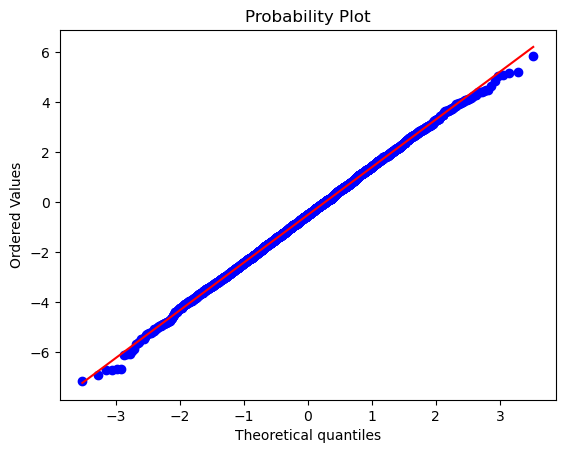

Weight


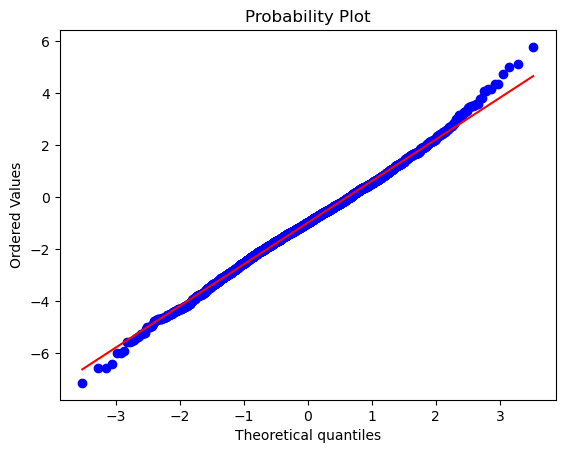

Sweetness


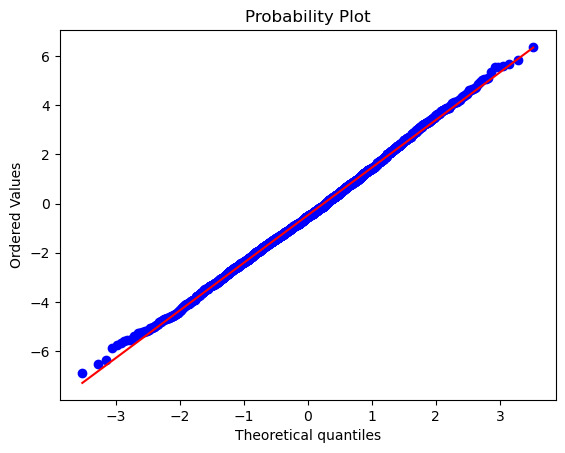

Crunchiness


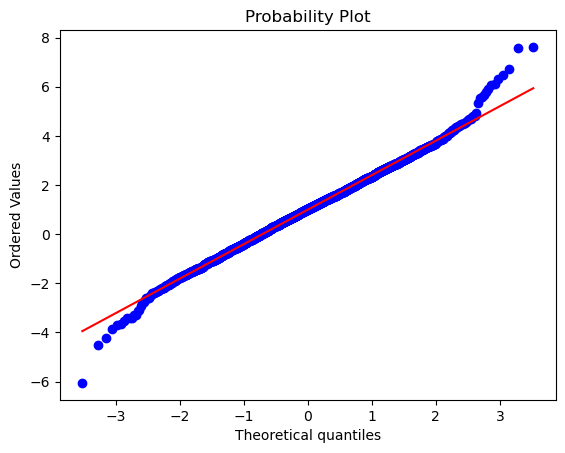

Juiciness


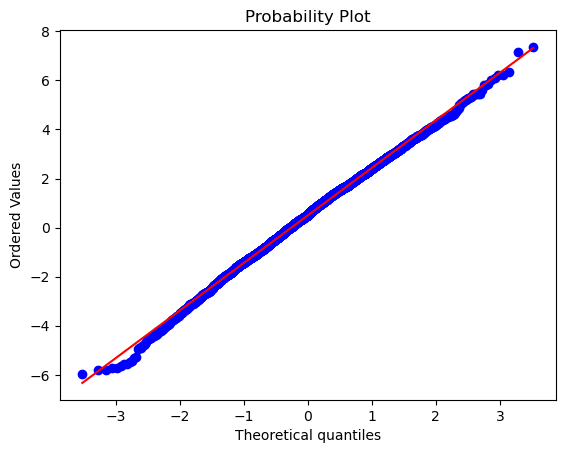

Ripeness


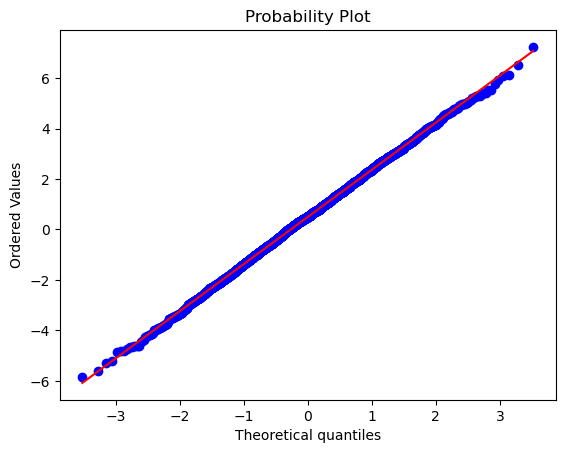

Acidity


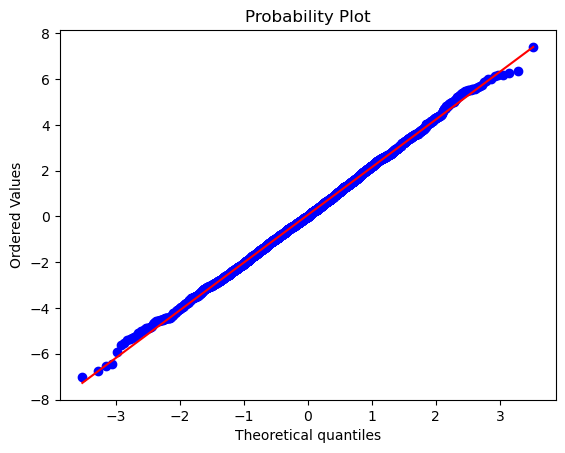

In [20]:
for y in x_train.columns:
    plt.subplot(111)
    ss.probplot(x_train[y], dist="norm", fit=True, plot=plt)
    print(y)
    plt.show()

### Gaussian Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
gb = GaussianNB()

In [23]:
model = gb.fit(x_train,y_train)

C:\Users\Nithya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Accuracy of the model

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, model.predict(x_test))

0.76625

### Confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score,f1_score, classification_report

In [27]:
cm = confusion_matrix(y_test, model.predict(x_test))
cm

array([[295, 104],
       [ 83, 318]], dtype=int64)

In [28]:
ConfusionMatrixDisplay(cm,display_labels=gb.classes_)

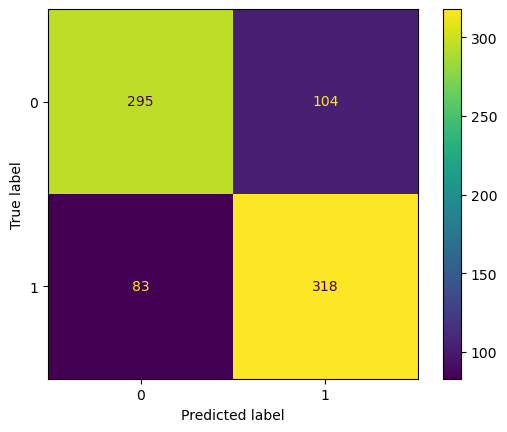

In [29]:
i=ConfusionMatrixDisplay(cm,display_labels=gb.classes_)
i.plot()
plt.show()

In [24]:
precision_score(y_test, model.predict(x_test),pos_label=1)

0.7535545023696683

In [25]:
precision_score(y_test, model.predict(x_test),pos_label=0)

0.7804232804232805

In [26]:
recall_score(y_test, model.predict(x_test),pos_label=1)

0.7930174563591023

In [28]:
recall_score(y_test, model.predict(x_test),pos_label=0)

0.7393483709273183

In [30]:
f1_score(y_test, model.predict(x_test))

0.772782503037667

In [31]:
f1_score(y_test, model.predict(x_test),pos_label=1)

0.772782503037667

In [32]:
f1_score(y_test, model.predict(x_test),pos_label=0)

0.7593307593307594

In [35]:
classification_report(y_test, model.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       0.78      0.74      0.76       399\n           1       0.75      0.79      0.77       401\n\n    accuracy                           0.77       800\n   macro avg       0.77      0.77      0.77       800\nweighted avg       0.77      0.77      0.77       800\n'

In [30]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       399
           1       0.75      0.79      0.77       401

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



accuracy also known as micro avg cannot be used for imbalance data because it favours for classes with high datapoints

weighted avg = 399 * 0.78 + 401 * 0.75 // 2

macro avg can be used for imbalanced data because it treates both classes equally

In [42]:
from sklearn.metrics import roc_curve,roc_auc_score

In [37]:
pr=model.predict_proba(x_test)[:,1]

In [40]:
fpr,tpr,_=roc_curve(y_test,pr)

In [44]:
fpr1,tpr1,_=roc_curve(y_test,[0 for y in range(len(y_test))])

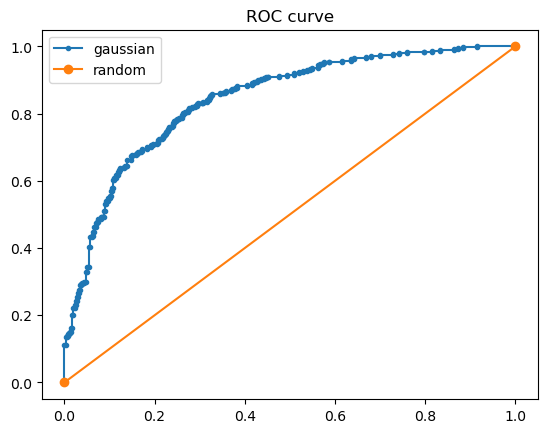

In [46]:
plt.plot(fpr,tpr,marker=".",label="gaussian")
plt.plot(fpr1,tpr1,marker="o",label="random")
plt.title("ROC curve")
plt.legend()
plt.show()

In [43]:
roc_auc_score(y_test,pr)

0.8416302601891261

In [32]:
import pickle

In [33]:
pickle.dump(model,open(r"C:\Users\Nithya\Downloads\apple-quality_model.pkl","wb"))

In [34]:
fm = pickle.load(open(r"C:\Users\Nithya\Downloads\apple-quality_model.pkl","rb"))

In [35]:
fm.predict(x_test)

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,